<a href="https://colab.research.google.com/github/RaedAbdelkefi/A-First-Course-in-Stochastic-Calculus/blob/main/It%C3%B4_Processes_and_SDEs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##1.Simulating SDEs

In [ ]:
def Euler(x,mu,n,dt,dB):
  steps=dB.shape[0]
  S0=x*np.ones((1,n))
  a=S0
  for i in range(1,steps):
    S1=a*dB[i,:]+(mu+1/2)*a*dt[i,:]
    S0=np.concatenate((S0,S1),axis=0)
    a+=S1
  S=S0.cumsum(axis=0)
  return S

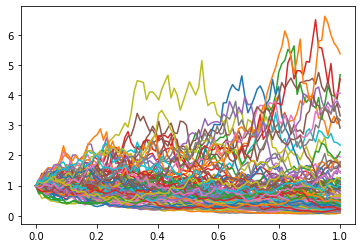

In [ ]:
steps=100
n=100
dB=np.sqrt(1/steps)*np.random.standard_normal((steps,n))
times=np.linspace(0,1,steps)
dt=(1/steps)*np.ones((steps,n))
S=Euler(1,-0.5,n,dt,dB)
plt.plot(times,S)
plt.show()

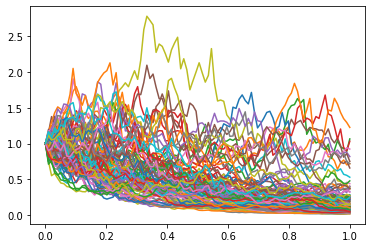

In [ ]:
S=Euler(1,-2,n,dt,dB)
plt.plot(times,S)
plt.show()

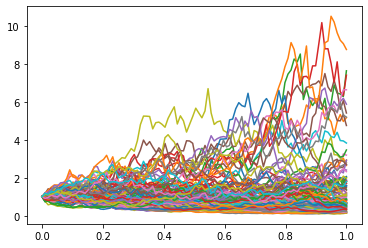

In [ ]:
S=Euler(1,0,n,dt,dB)
plt.plot(times,S)
plt.show()

In [ ]:
def Milestein(x,mu,n,dt,dB):
  steps=dB.shape[0]
  S0=x*np.ones((1,n))
  a=S0
  for i in range(1,steps):
    S1=a*dB[i,:]+(mu+1/2)*a*dt[i,:]+(a/2)*((dB[i,:]**2)-dt[i,:])
    S0=np.concatenate((S0,S1),axis=0)
    a+=S1
  S=S0.cumsum(axis=0)
  return S

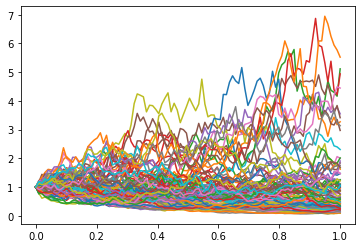

In [ ]:
S=Milestein(1,-0.5,n,dt,dB)
plt.plot(times,S)
plt.show()

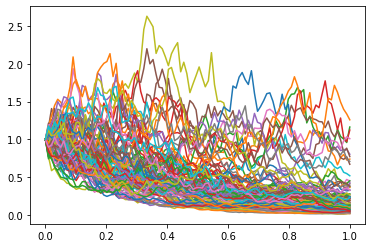

In [ ]:
S=Milestein(1,-2,n,dt,dB)
plt.plot(times,S)
plt.show()

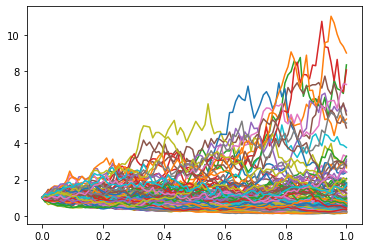

In [ ]:
S=Milestein(1,0,n,dt,dB)
plt.plot(times,S)
plt.show()

##2. Euler vs Milstein

In [ ]:
steps=100
n=100
def SDE(steps,n,dB):
  B=np.concatenate((np.zeros((1,n)), dB[:steps-1,:].cumsum(axis=0) ),axis=0)
  t=((1/steps)*np.ones((steps,n))).cumsum(axis=0)
  S_o=np.exp(B-t/2)
  return S_o


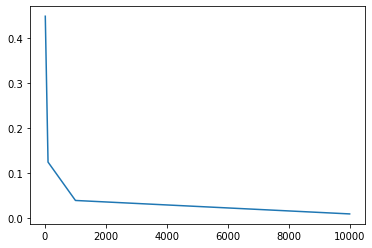

In [ ]:
def E(steps,n):
  dB=np.sqrt(1/steps)*np.random.standard_normal((steps,n))
  dt=(1/steps)*np.ones((steps,n))
  S=Euler(1,-0.5,n,dt,dB)
  S_o=SDE(steps,n,dB)
  E=((1/n)*np.abs(S_o[-1,:]-S[-1,:])).sum()
  return E
dn=[10 , 100 , 1000 , 10000]
n=100
l=list()
for i in dn:
  l.append(E(i,n))
plt.plot(dn,l)
plt.show()


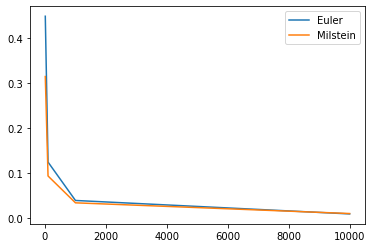

In [ ]:
def E1(steps,n):
  dB=np.sqrt(1/steps)*np.random.standard_normal((steps,n))
  dt=(1/steps)*np.ones((steps,n))
  S=Milestein(1,-0.5,n,dt,dB)
  S_o=SDE(steps,n,dB)
  E=((1/n)*np.abs(S_o[-1,:]-S[-1,:])).sum()
  return E
dn=[10 , 100 , 1000 , 10000]
n=100
l1=list()
for i in dn:
  l1.append(E1(i,n))
plt.plot(dn,l,label='Euler')
plt.plot(dn,l1, label='Milstein')
plt.legend()
plt.show()


##3. The CIR model

In [ ]:
def CIR(x,a,n,dt,dB):
  steps=dB.shape[0]
  S0=x*np.ones((1,n))
  A=S0
  for i in range(1,steps):
    S1=np.sqrt(A)*dB[i,:]+(a-A)*dt[i,:]
    S0=np.concatenate((S0,S1),axis=0)
    A+=S1
    for i in range(n):
      if A[:,i]<0:
        A[:,i]=0
      
  S=S0.cumsum(axis=0)
  return S

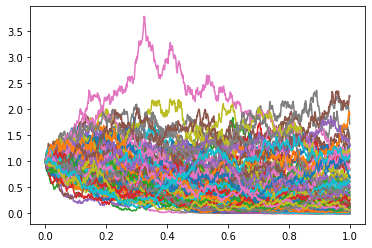

In [ ]:
steps=1000
n=100
dB=np.sqrt(1/steps)*np.random.standard_normal((steps,n))
times=np.linspace(0,1,steps)
dt=(1/steps)*np.ones((steps,n))
S=CIR(1,0.1,n,dt,dB)
plt.plot(times,S)
plt.show()

##4. Bessel process

In [ ]:
def Euler(x,mu,n,dt,dB):
  steps=dB.shape[0]
  S0=x*np.ones((1,n))
  a=S0
  for i in range(1,steps):
    S1=dB[i,:]+((mu-1)/(2*a))*dt[i,:]
    S0=np.concatenate((S0,S1),axis=0)
    a+=S1
  S=S0.cumsum(axis=0)
  return S

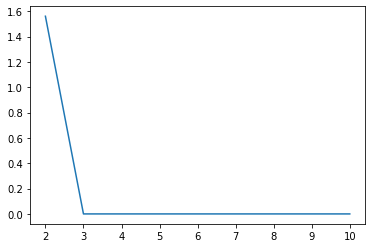

In [ ]:
dn=[2,3,10]
l=list()
for d in dn:
  S=Euler(1,d,100,dt,dB)
  A=np.array(S<0).sum()
  l.append(A/100)
plt.plot(dn,l)
plt.show()

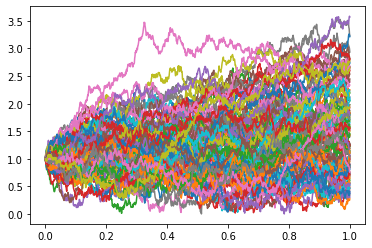

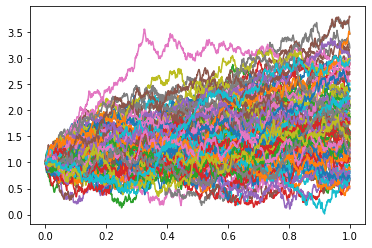

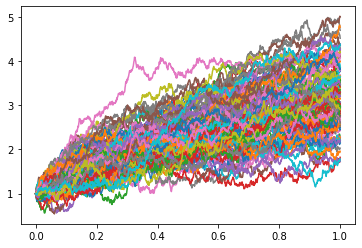

In [ ]:
dn=[2,3,10]
l=list()
for d in dn:
  S=Euler(1,d,100,dt,dB)
  f(S,steps,n,times)



In [ ]:
def f(S,steps,n,times):
  
  A=np.array(S<0).sum(axis=0)
  B=np.where(A>0)
  L=list()
  for i in range(n):
    if i in B[0]:
      continue
    L.append(i)
  D=np.ones((steps,1))

  for i in L:
    E=np.copy(S[:,i])
    E.resize((steps,1))
    D=np.concatenate((D,E), axis=1)
  plt.plot(times,D[:,1:])
  plt.show()

In [ ]:
def Milestein(x,mu,n,dt,dB):
  steps=dB.shape[0]
  S0=x*np.ones((1,n))
  a=S0
  for i in range(1,steps):
    S1=dB[i,:]+((mu-1)/(2*a))*dt[i,:]+(1/2)*((dB[i,:]**2)-dt[i,:])
    S0=np.concatenate((S0,S1),axis=0)
    a+=S1
  S=S0.cumsum(axis=0)
  return S

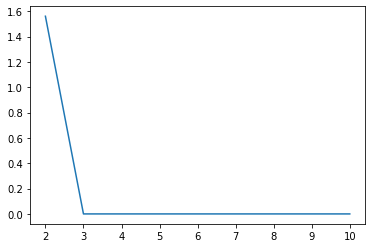

In [ ]:
dn=[2,3,10]
l1=list()
for d in dn:
  S=Milestein(1,d,100,dt,dB)
  A=np.array(S<0).sum()
  l1.append(A/100)
plt.plot(dn,l1)
plt.show()

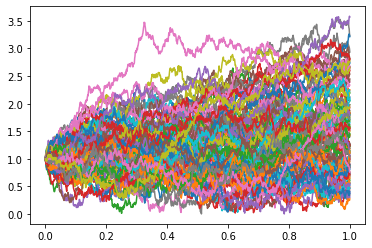

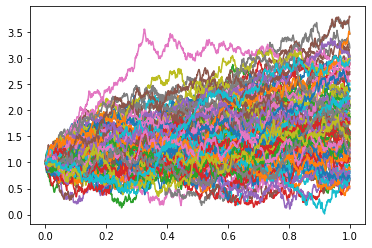

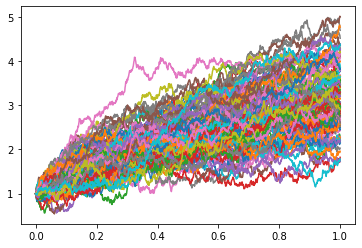

In [ ]:
dn=[2,3,10]
l=list()
for d in dn:
  S=Euler(1,d,100,dt,dB)
  f(S,steps,n,times)

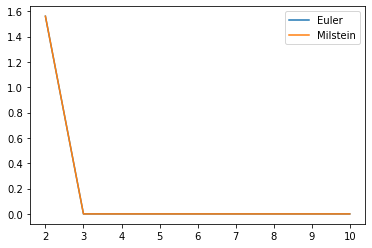

In [ ]:
plt.plot(dn,l,label='Euler')
plt.plot(dn,l1, label='Milstein')
plt.legend()
plt.show()

##5. Explosion time. Consider the SDE

In [ ]:
def Euler(x,mu,n,dt,dB):
  steps=dB.shape[0]
  S0=x*np.ones((1,n))
  a=S0
  for i in range(1,steps):
    S1=np.exp(a)*dB[i,:]
    S0=np.concatenate((S0,S1),axis=0)
    a+=S1
  S=S0.cumsum(axis=0)
  return S

<ipython-input-148-cc4ccdd49e69>:6: RuntimeWarning: overflow encountered in exp
  S1=np.exp(a)*dB[i,:]
<ipython-input-148-cc4ccdd49e69>:8: RuntimeWarning: invalid value encountered in add
  a+=S1


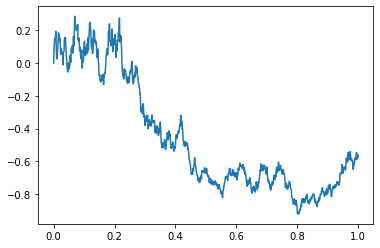

In [ ]:
Y=Euler(0,0,n,dt,dB)
plt.plot(times,Y[:,0])
plt.show()

##6. A martingale 

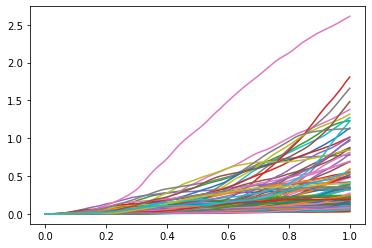

In [ ]:
B0=np.zeros((1,n))
B=np.concatenate((B0,np.cumsum(dB[:steps-1,:] , axis=0)), axis=0)
Q=((B**2)*dt).cumsum(axis=0)
plt.plot(times,Q)
plt.show()

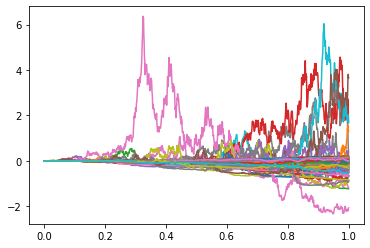

In [ ]:
X=(B*dB).cumsum(axis=0)
M=X**2-Q
plt.plot(times,M)
plt.show()